In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:

def organize_data():
    os.chdir('/maize-leaf-disease-classifier/dataset')
    if os.path.isdir('train/0/') is False:
        os.mkdir('train')
        os.mkdir('valid')
        os.mkdir('test')

        for i in range(0, 4):
            shutil.move(f'{i}', 'train')
            os.mkdir(f'valid/{i}')
            os.mkdir(f'test/{i}')

            valid_samples = random.sample(os.listdir(f'train/{i}'), 150)
            for j in valid_samples:
                shutil.move(f'train/{i}/{j}', f'valid/{i}')

            test_samples = random.sample(os.listdir(f'train/{i}'), 150)
            for k in test_samples:
                shutil.move(f'train/{i}/{k}', f'test/{i}')
    os.chdir('../..')


organize_data()

<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\musha\AppData\Local\Temp\ipykernel_38228\3402668662.py:3: SyntaxWarning: invalid escape sequence '\M'
  os.chdir('C:/Users/musha/OneDrive/Documents/Forage Experience\Maize/maize-disease-classifier1/dataset')


In [ ]:

train_path = '/maize-leaf-disease-classifier/dataset/dataset/train'
valid_path = '/maize-leaf-disease-classifier/dataset/dataset/valid'
test_path = '/maize-leaf-disease-classifier/dataset/dataset/test'

In [ ]:

train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
).flow_from_directory(
    directory=train_path, 
    target_size=(224,224), 
    batch_size=10
)

valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
).flow_from_directory(
    directory=valid_path, 
    target_size=(224,224), 
    batch_size=10
)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
).flow_from_directory(
    directory=test_path, 
    target_size=(224,224), 
    batch_size=10, 
    shuffle=False
)

Found 3562 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

x = mobile.layers[-5].output
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units=4, activation='softmax')(x)

model = Model(inputs=mobile.input, outputs=output)

for layer in model.layers[:-22]:
    layer.trainable = False

model.summary()

model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(
    x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=50,
    verbose=2
)


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,232,964 (12.33 MB)

 Trainable params: 1,866,756 (7.12 MB)

 Non-trainable params: 1,366,208 (5.21 MB)

Epoch 1/50
357/357 - 43s - 120ms/step - accuracy: 0.8866 - loss: 0.3060 - val_accuracy: 0.9350 - val_loss: 0.1981
Epoch 2/50
357/357 - 45s - 127ms/step - accuracy: 0.9587 - loss: 0.1199 - val_accuracy: 0.9383 - val_loss: 0.1674
Epoch 3/50
357/357 - 38s - 108ms/step - accuracy: 0.9826 - loss: 0.0616 - val_accuracy: 0.9283 - val_loss: 0.1971
Epoch 4/50
357/357 - 36s - 102ms/step - accuracy: 0.9888 - loss: 0.0447 - val_accuracy: 0.9500 - val_loss: 0.1355
Epoch 5/50
357/357 - 37s - 102ms/step - accuracy: 0.9919 - loss: 0.0348 - val_accuracy: 0.9667 - val_loss: 0.1070
Epoch 6/50
357/357 - 37s - 103ms/step - accuracy: 0.9896 - loss: 0.0343 - val_accuracy: 0.9767 - val_loss: 0.0923
Epoch 7/50
357/357 - 38s - 106ms/step - accuracy: 0.9924 - loss: 0.0275 - val_accuracy: 0.9800 - val_loss: 0.0717
Epoch 8/50
357/357 - 39s - 110ms/step - accuracy: 0.9966 - loss: 0.0180 - val_accuracy: 0.9667 - val_loss: 0.1182
Epoch 9/50
357/357 - 40s - 111ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 

In [ ]:

test_labels = test_batches.classes


predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


In [ ]:

cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:

print("Class indices:", test_batches.class_indices)

Class indices: {'0': 0, '1': 1, '2': 2, '3': 3}


Confusion matrix, without normalization
[[145   1   4   0]
 [  1 147   1   1]
 [  7   0 143   0]
 [  0   0   0 150]]


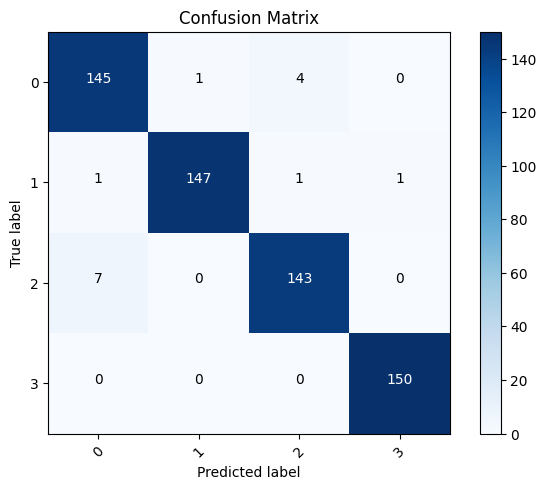

In [ ]:

labels = ['0', '1', '2', '3']
plot_confusion_matrix(cm=cm, classes=labels, title='Confusion Matrix')

In [ ]:

model.save('/maize-leaf-disease-classifier/dataset/saved_model/mobilNet_maize_leaf_disease_model.keras')

print("Model training completed and saved successfully!")

Model training completed and saved successfully!


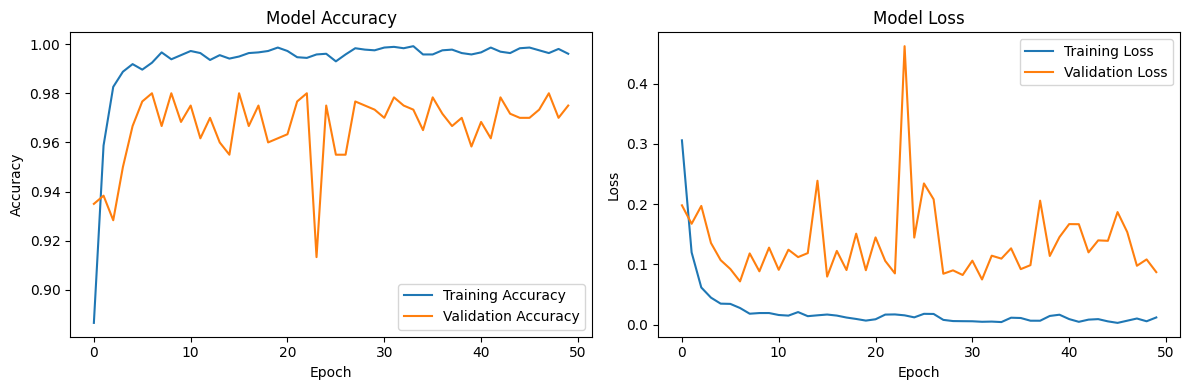

In [ ]:

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

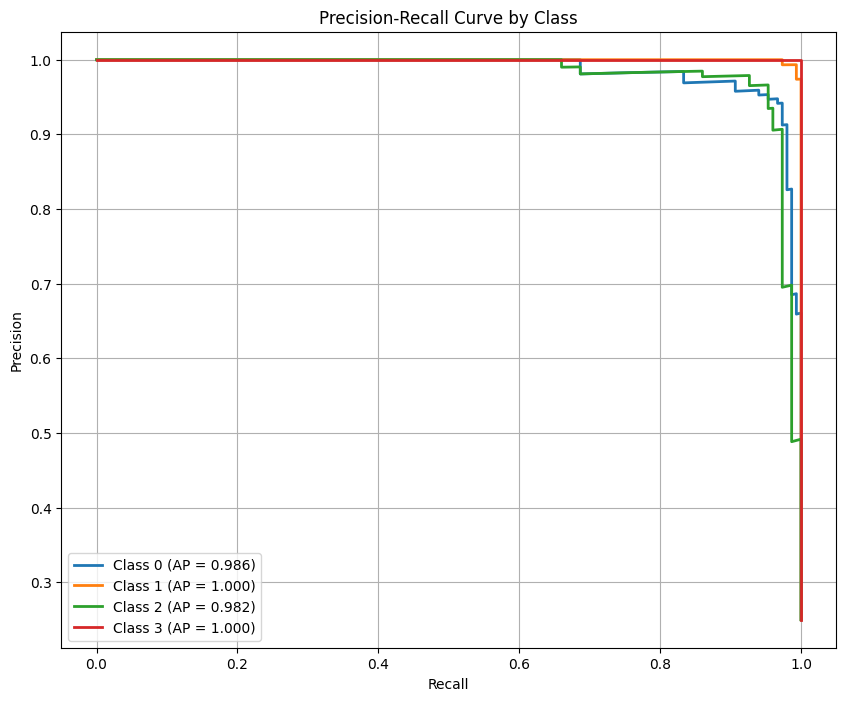

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score


y_pred_proba = model.predict(test_batches, verbose=0)


plt.figure(figsize=(10, 8))
for i in range(4):
    precision, recall, _ = precision_recall_curve(test_labels == i, y_pred_proba[:, i])
    ap = average_precision_score(test_labels == i, y_pred_proba[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i} (AP = {ap:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve by Class')
plt.legend()
plt.grid(True)
plt.show()

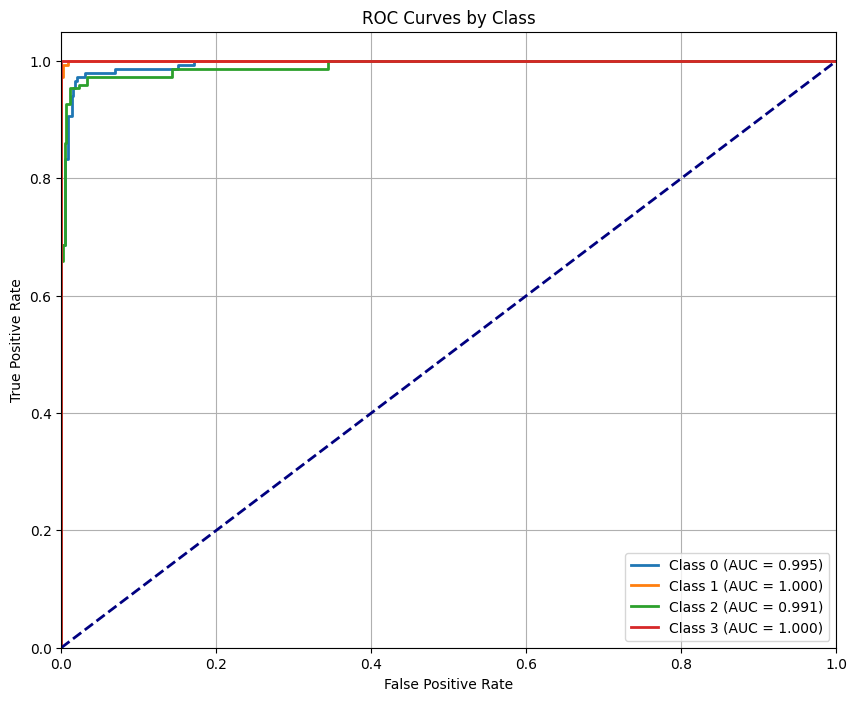

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(test_labels, classes=[0, 1, 2, 3])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(4):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves by Class')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support


y_pred = np.argmax(y_pred_proba, axis=1)


print("=" * 60)
print("DETAILED CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(test_labels, y_pred, 
                          target_names=[f'Class_{i}' for i in range(4)],
                          digits=4))


precision, recall, f1, support = precision_recall_fscore_support(test_labels, y_pred)

print("\nPER-CLASS METRICS:")
print("-" * 40)
for i in range(4):
    print(f"Class {i}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1={f1[i]:.4f}, Support={support[i]}")

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Class_0     0.9477    0.9667    0.9571       150
     Class_1     0.9932    0.9800    0.9866       150
     Class_2     0.9662    0.9533    0.9597       150
     Class_3     0.9934    1.0000    0.9967       150

    accuracy                         0.9750       600
   macro avg     0.9751    0.9750    0.9750       600
weighted avg     0.9751    0.9750    0.9750       600


PER-CLASS METRICS:
----------------------------------------
Class 0: Precision=0.9477, Recall=0.9667, F1=0.9571, Support=150
Class 1: Precision=0.9932, Recall=0.9800, F1=0.9866, Support=150
Class 2: Precision=0.9662, Recall=0.9533, F1=0.9597, Support=150
Class 3: Precision=0.9934, Recall=1.0000, F1=0.9967, Support=150



MISCLASSIFICATION ANALYSIS (15 errors):


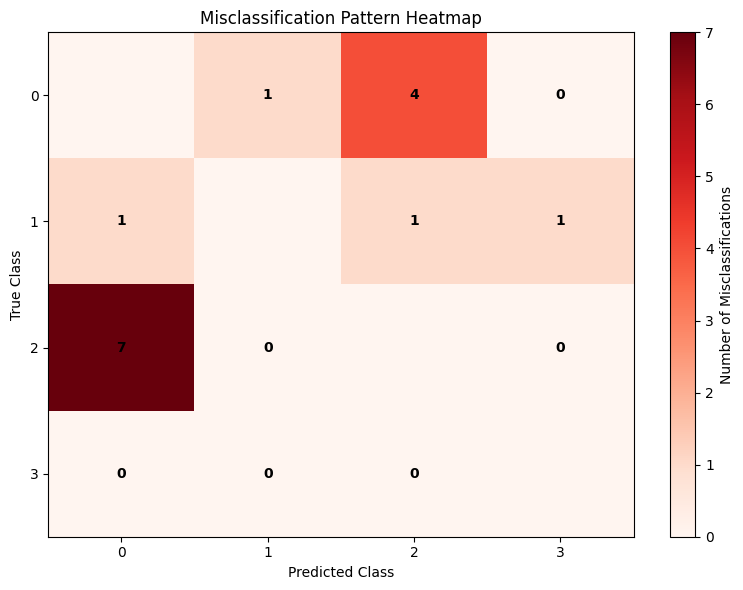


MOST COMMON MISCLASSIFICATION PATTERNS:
True: Class 2 → Pred: Class 0 (Count: 7)
True: Class 0 → Pred: Class 2 (Count: 4)
True: Class 0 → Pred: Class 1 (Count: 1)
True: Class 1 → Pred: Class 0 (Count: 1)
True: Class 1 → Pred: Class 2 (Count: 1)


In [ ]:
# Analyze misclassifications
misclassified_idx = np.where(y_pred != test_labels)[0]

if len(misclassified_idx) > 0:
    print(f"\nMISCLASSIFICATION ANALYSIS ({len(misclassified_idx)} errors):")
    print("=" * 50)
    

    error_matrix = np.zeros((4, 4), dtype=int)
    for idx in misclassified_idx:
        true_class = test_labels[idx]
        pred_class = y_pred[idx]
        error_matrix[true_class, pred_class] += 1
    

    plt.figure(figsize=(8, 6))
    plt.imshow(error_matrix, cmap='Reds', aspect='auto')
    plt.colorbar(label='Number of Misclassifications')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Misclassification Pattern Heatmap')
    plt.xticks(range(4))
    plt.yticks(range(4))
    
 
    for i in range(4):
        for j in range(4):
            if i != j:  
                plt.text(j, i, error_matrix[i, j], 
                        ha='center', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    

    print("\nMOST COMMON MISCLASSIFICATION PATTERNS:")
    error_counts = []
    for i in range(4):
        for j in range(4):
            if i != j and error_matrix[i, j] > 0:
                error_counts.append((i, j, error_matrix[i, j]))
    
    error_counts.sort(key=lambda x: x[2], reverse=True)
    for true_class, pred_class, count in error_counts[:5]:  # Top 5
        print(f"True: Class {true_class} → Pred: Class {pred_class} (Count: {count})")

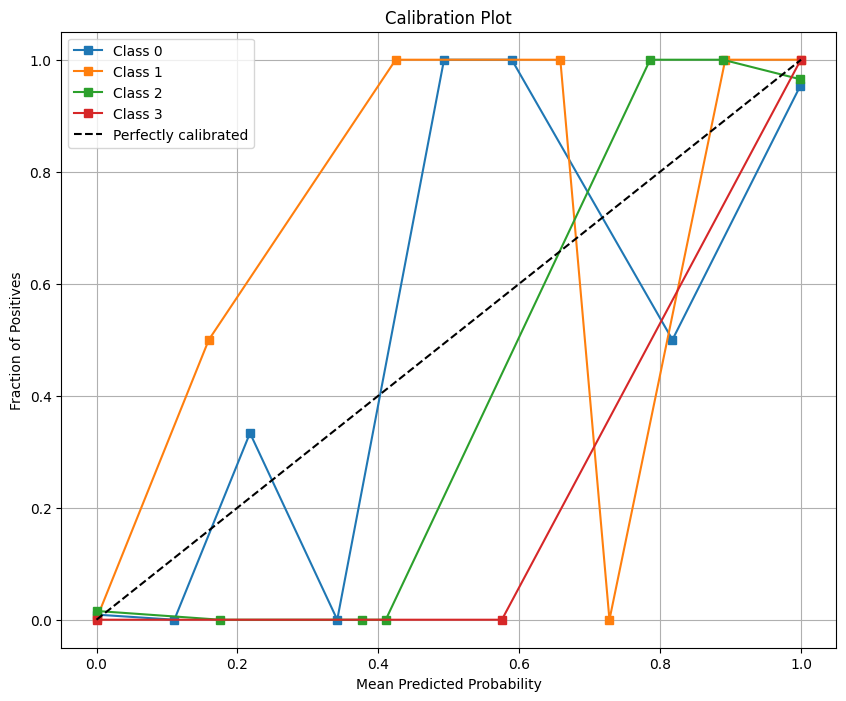

In [ ]:
from sklearn.calibration import calibration_curve


plt.figure(figsize=(10, 8))
for i in range(4):
    prob_true, prob_pred = calibration_curve(
        (test_labels == i), y_pred_proba[:, i], n_bins=10
    )
    plt.plot(prob_pred, prob_true, 's-', label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend()
plt.grid(True)
plt.show()